# Extracting and saving features.

In [1]:
import tensorflow

In [2]:
import numpy as np
from numpy.linalg import norm
import tqdm
import os
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [3]:
import pickle

In [4]:
model = ResNet50(weights='imagenet', include_top=False,
                input_shape=(224,224,3))

In [5]:
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(
        input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features
    

In [6]:
features = extract_features('datasets/test_cat.jpg', model)
print(len(features))

100352


In [7]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list

In [8]:
root_dir = 'datasets/caltech101'
filenames = sorted(get_file_list(root_dir))

In [9]:
print(filenames)

['datasets/caltech101\\Faces\\image_0001.jpg', 'datasets/caltech101\\Faces\\image_0002.jpg', 'datasets/caltech101\\Faces\\image_0003.jpg', 'datasets/caltech101\\Faces\\image_0004.jpg', 'datasets/caltech101\\Faces\\image_0005.jpg', 'datasets/caltech101\\Faces\\image_0006.jpg', 'datasets/caltech101\\Faces\\image_0007.jpg', 'datasets/caltech101\\Faces\\image_0008.jpg', 'datasets/caltech101\\Faces\\image_0009.jpg', 'datasets/caltech101\\Faces\\image_0010.jpg', 'datasets/caltech101\\Faces\\image_0011.jpg', 'datasets/caltech101\\Faces\\image_0012.jpg', 'datasets/caltech101\\Faces\\image_0013.jpg', 'datasets/caltech101\\Faces\\image_0014.jpg', 'datasets/caltech101\\Faces\\image_0015.jpg', 'datasets/caltech101\\Faces\\image_0016.jpg', 'datasets/caltech101\\Faces\\image_0017.jpg', 'datasets/caltech101\\Faces\\image_0018.jpg', 'datasets/caltech101\\Faces\\image_0019.jpg', 'datasets/caltech101\\Faces\\image_0020.jpg', 'datasets/caltech101\\Faces\\image_0021.jpg', 'datasets/caltech101\\Faces\\imag

In [ ]:
feature_list = []
for i in tqdm.tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

In [ ]:
pickle.dump(feature_list, open('datasets/features-caltech101-resnet.pickle', 'wb'))

In [ ]:
pickle.dump(filenames, open('datasets/filenames-caltech101.pickle', 'wb'))

# Realoading the seariliazed objects.

In [10]:
filenames = pickle.load(open('datasets/filenames-caltech101.pickle', 'rb'))

In [11]:
feature_list = pickle.load(open('datasets/features-caltech101-resnet.pickle', 'rb'))

# Querying the engine with images

In [12]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors([feature_list[1]])

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

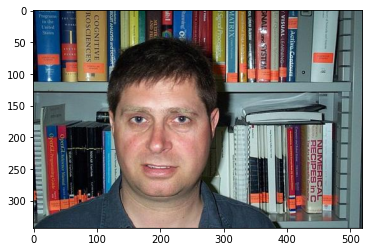

In [14]:
# Query image.
plt.imshow(mpimg.imread(filenames[1]))

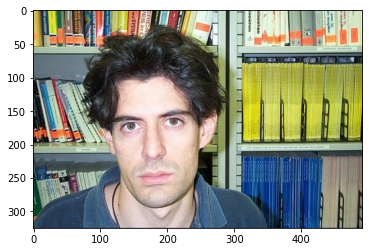

In [20]:
# Print the second most similar image to query image
# since the most similar image would be query image itself
plt.imshow(mpimg.imread(filenames[indices[0][1]]))

In [21]:
# distances between query image and returned images.
for i in range(5):
    print(distances[0][i])

1.0536712e-07
0.95881814
0.9624109
0.97095716
0.973637


In [22]:
import random

In [23]:
def plot_images(similar_image_paths, distances):
    for i in range(len(similar_image_paths)):
        plt.figure()
        plt.imshow(mpimg.imread(similar_image_paths[i]))
        if i == 0:
            plt.title('Query image')
        else:
            plt.title(f"similarity with query image: {distances[i]}")

c:\users\parth\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


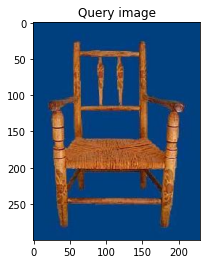

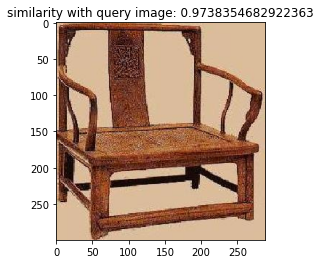

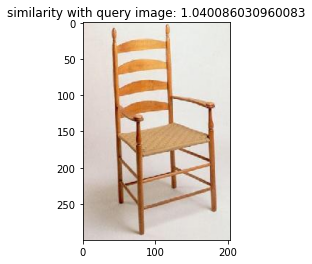

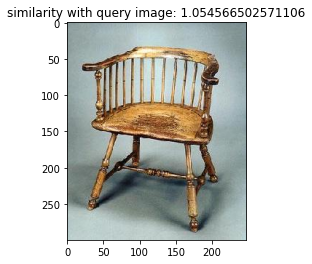

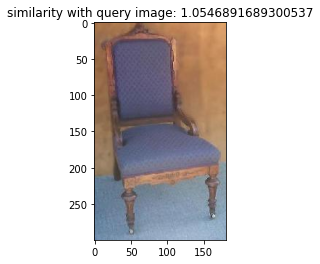

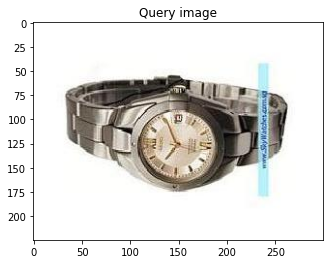

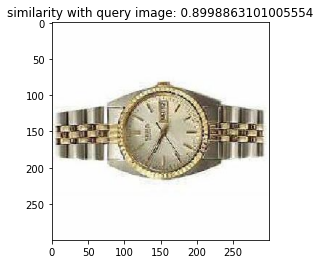

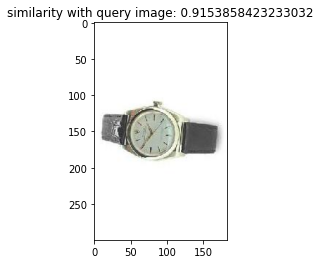

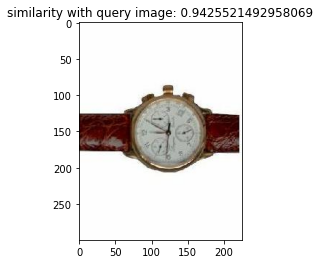

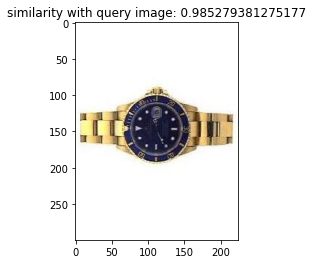

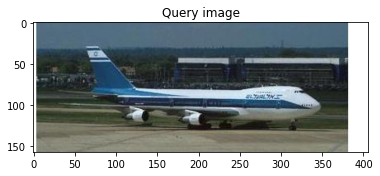

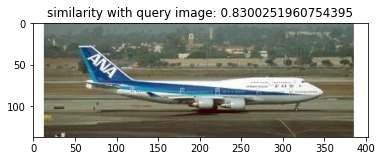

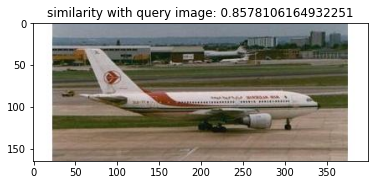

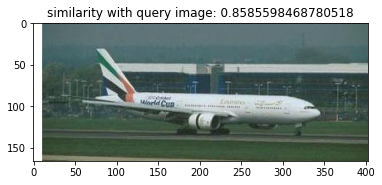

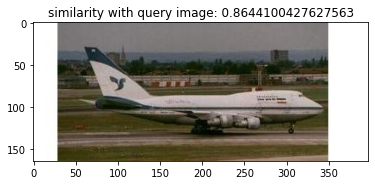

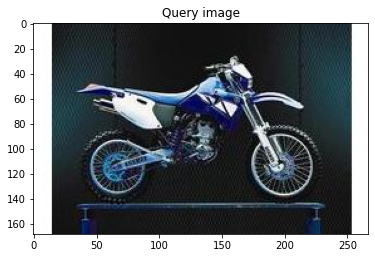

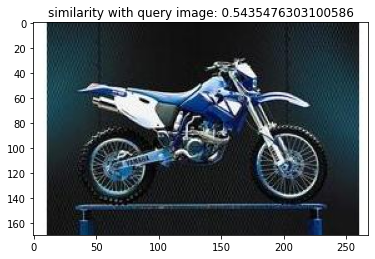

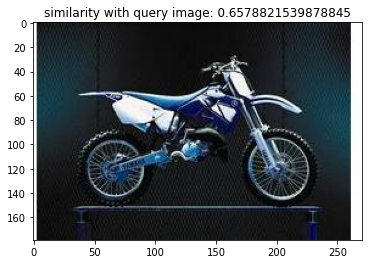

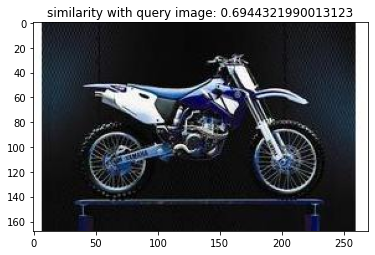

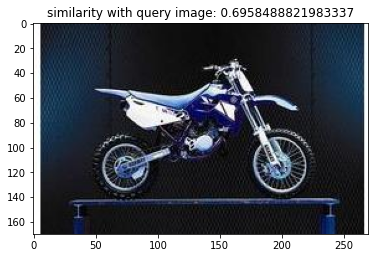

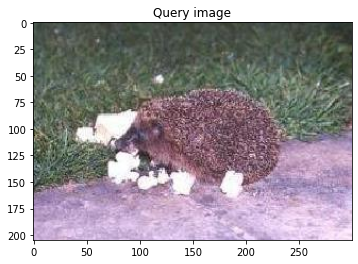

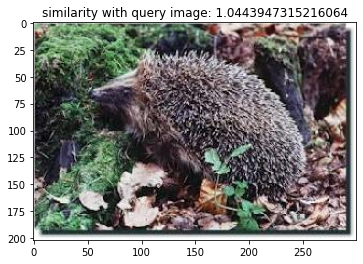

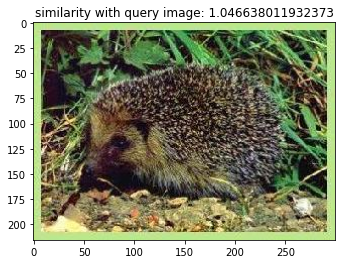

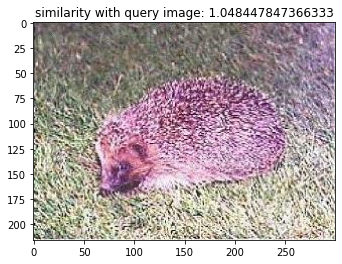

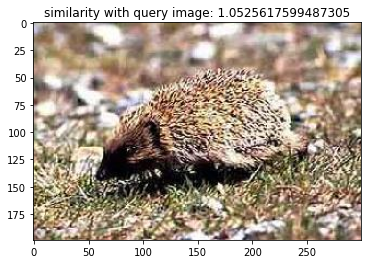

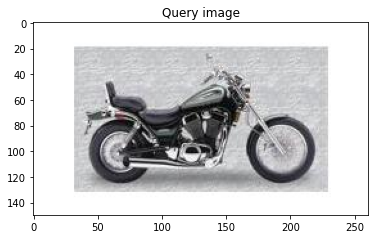

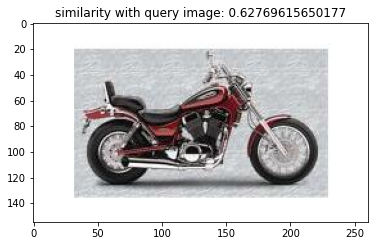

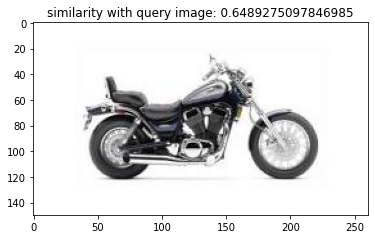

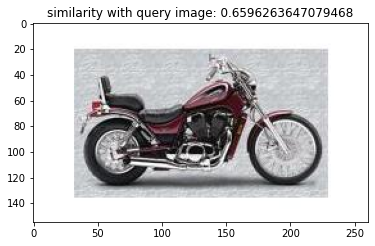

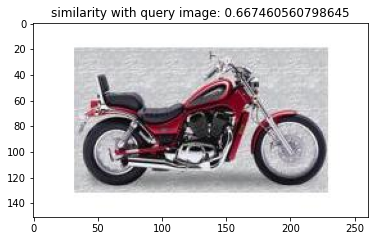

In [24]:
for i in range(6):
    random_image_index = random.randint(0, len(feature_list))
    distances, indices = neighbors.kneighbors([feature_list[random_image_index]])
    similar_image_paths = [filenames[random_image_index]] + [filenames[indices[0][i]] for i in range(1,len(indices[0]))]
    plot_images(similar_image_paths, distances[0])